In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import scipy.stats as st
#import functions as fun

In [2]:
scens = ['rcp45','rcp85']
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .97
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .8
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .01
mpl.rcParams['figure.figsize']        = 7,2.5


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [4]:
#Get 1x1 degree grid
with xr.open_dataset('../rawdata/rsl_85_2090.nc') as ds:
    lon = ds['x'].values
    lat = ds['y'].values
    slr_md = ds['slr_md'].values

In [5]:
with xr.open_dataset(f'../data/sig_process.nc') as ds:
    lon  = ds['lon'].values
    lat  = ds['lat'].values
    glac = ds['glac'].values
    gsmb = ds['gsmb'].values
    gdyn = ds['gdyn'].values
    asmb = ds['asmb'].values
    adyn = ds['adyn'].values
    lws  = ds['lws'].values
    gia  = ds['gia'].values
Pglac = glac**2
Pgsmb = gsmb**2
Pgdyn = gdyn**2
Pasmb = asmb**2
Padyn = adyn**2
Plws  = lws**2
Pgia  = gia**2
Ptotal = Pglac+Pgsmb+Pgdyn+Pasmb+Padyn+Plws+Pgia

In [6]:
def nanvar(var):
    vvar = np.nanvar(var,axis=0)
    vvar[np.isnan(slr_md)]=np.nan
    return vvar

In [7]:
Ctotal = np.zeros((2,len(lat),len(lon)))
Cstdn = np.zeros((2,len(lat),len(lon)))
Cglac = np.zeros((2,len(lat),len(lon)))
Cgsmb = np.zeros((2,len(lat),len(lon)))
Casmb = np.zeros((2,len(lat),len(lon)))
Cadyn = np.zeros((2,len(lat),len(lon)))

for s,scen in enumerate(scens):
    with xr.open_dataset(f'../data/rsl/{mods[0]}_{scen}.nc') as ds:
        lon = ds['lon'].values
        lat = ds['lat'].values
    stdn = np.zeros((len(mods),len(lat),len(lon)))
    glac = np.zeros((len(mods),len(lat),len(lon)))
    gsmb = np.zeros((len(mods),len(lat),len(lon)))
    asmb = np.zeros((len(mods),len(lat),len(lon)))
    adyn = np.zeros((len(mods),len(lat),len(lon)))
    
    for m,model in enumerate(mods):
        with xr.open_dataset(f'../data/rsl/{model}_{scen}.nc') as ds:
            stdn[m,:,:] = np.nanmean(ds['stdn'][-20:,:,:].values,axis=0)
            glac[m,:,:] = np.nanmean(ds['glac'][-20:,:,:].values,axis=0)  
            gsmb[m,:,:] = np.nanmean(ds['gsmb'][-20:,:,:].values,axis=0)
            asmb[m,:,:] = np.nanmean(ds['asmb'][-20:,:,:].values,axis=0)
            adyn[m,:,:] = np.nanmean(ds['adyn'][-20:,:,:].values,axis=0)
    Cstdn[s,:,:] = nanvar(stdn)
    Cglac[s,:,:] = nanvar(glac)
    Cgsmb[s,:,:] = nanvar(gsmb)
    Casmb[s,:,:] = nanvar(asmb)
    Cadyn[s,:,:] = nanvar(adyn)
    Ctotal[s,:,:] = nanvar(stdn+glac+gsmb+asmb+adyn)

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice.
  


In [8]:
#Sigmas
Stotal= np.sqrt(Ctotal+Ptotal)
Sstdn = np.sqrt(Cstdn)
Sglac = np.sqrt(Cglac+Pglac)
Sgsmb = np.sqrt(Cgsmb+Pgsmb)
Sgdyn = np.sqrt(Pgdyn)
Sasmb = np.sqrt(Casmb+Pasmb)
Sadyn = np.sqrt(Cadyn+Padyn)
Slws  = np.sqrt(Plws)
Sgia  = np.sqrt(Pgia)

In [9]:
#Real
v0 = Stotal**2
#No codep
v1 = Sstdn**2+Sglac**2+Sgsmb**2+Sgdyn**2+Sasmb**2+Sadyn**2+Slws**2+Sgia**2
#Ad hoc codep
v2 = (Sstdn+Sgsmb+Sasmb)**2+Sglac**2+Sgdyn**2+Sadyn**2+Slws**2+Sgia**2
#Global codep
v3 = v1 +2*.426*Sstdn*Sglac + 2*.613*Sstdn*Sgsmb + 2*.139*Sstdn*Sasmb - 2*.2*Sstdn*Sadyn +2*.824*Sglac*Sgsmb -2*.176*Sglac*Sadyn -2*.247*Sgsmb*Sadyn +2*.238*Sasmb*Sadyn


In [10]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

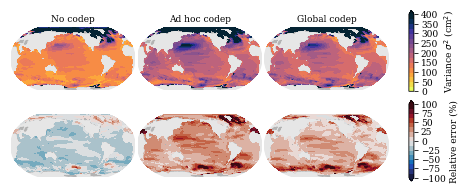

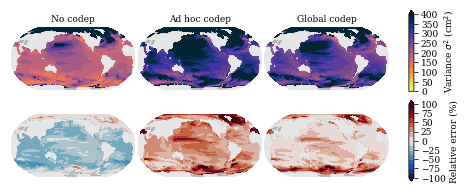

In [11]:
#cmap1 = plt.get_cmap('cmo.speed',16)
cmap1 = plt.get_cmap('cmo.thermal_r',16)
cmap2 = plt.get_cmap('cmo.balance',16)
vmax1 = 400
vmax2 = 100

for s,scen in enumerate(['rcp45','rcp85']):

    fig = plt.figure()
      
    ax = fig.add_subplot(2,3,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,v1[s,:,:],transform=ccrs.PlateCarree(),vmin=0,vmax=vmax1,cmap=cmap1)
    makeglobal(ax)
    ax.set_title('No codep')
    ax = fig.add_subplot(2,3,4,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*(v1[s,:,:]-v0[s,:,:])/v0[s,:,:],transform=ccrs.PlateCarree(),vmin=-vmax2,vmax=vmax2,cmap=cmap2)    
    makeglobal(ax)
    
    ax = fig.add_subplot(2,3,2,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,v2[s,:,:],transform=ccrs.PlateCarree(),vmin=0,vmax=vmax1,cmap=cmap1)
    makeglobal(ax)
    ax.set_title('Ad hoc codep')
    ax = fig.add_subplot(2,3,5,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*(v2[s,:,:]-v0[s,:,:])/v0[s,:,:],transform=ccrs.PlateCarree(),vmin=-vmax2,vmax=vmax2,cmap=cmap2)        
    makeglobal(ax)
    
    ax = fig.add_subplot(2,3,3,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,v3[s,:,:],transform=ccrs.PlateCarree(),vmin=0,vmax=vmax1,cmap=cmap1)
    makeglobal(ax)
    ax.set_title('Global codep')
    ax = fig.add_subplot(2,3,6,projection=ccrs.Robinson(central_longitude=200))
    im2 = ax.pcolormesh(lon,lat,100.*(v3[s,:,:]-v0[s,:,:])/v0[s,:,:],transform=ccrs.PlateCarree(),vmin=-vmax2,vmax=vmax2,cmap=cmap2)        
    makeglobal(ax)
    
    cax = fig.add_axes([.84,.55,.01,.45])
    cb = plt.colorbar(im,cax=cax,extend='max')
    cb.set_label('Variance $\sigma^2$ (cm$^2$)')

    cax = fig.add_axes([.84,.05,.01,.45])
    cb = plt.colorbar(im2,cax=cax,extend='both')
    cb.set_label('Relative error (%)')

    figname = f'draftplot_varerrtotal_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()